In [1]:
%reload_ext autoreload
%autoreload 2
from players.random_player import RandomPlayer
from players.monte_carlo_player import MonteCarloPlayer as MC

# Monte Carlo agent

## Hyperparameter

- Exploration rate : It defines the exploration rate of the agents and has a value between 0 and 1. Every time the agent has to make a move, it is generated a random value and if it is below the exploration rate value, the agent performs exploration by performing a random move, otherwise the agent performs exploitation by choosing the move with the highest reward based on his state value table
- Min exploration rate : It defines the minimum threshold for the exploration rate
- Exploration rate decay : It defines the decay of the exploration rate during the training phase. The decay is exponential
- State value : It defines the table used by the agent that contains as key the canonical representation of the state and as value the expected reward associated with that state
##### These hyperparameter has the purpose to show statistics about the learning process of the agent
- Reward : It contains all the rewards accumulated by the agent during the training process and its purpose is to show after the training how the performance evolved
- Mean rewards : it defines a list of mean reward for the agent during the training process
- Wins : it defines the total wins of the agent during the training phase
- Win rates : It defines a list of the medium win rate of the agent during the training process
### Updating formula
#### The updating formula for the update of the state-value table is the following 
$$
V(S_{t}) =  (1-\alpha )V(S_{t})+ \alpha * (R_{t+1}+\gamma V(S_{t+1}))
$$
- $\alpha$: is the learning rate of the agent during the training
- $\gamma$: is the discount rate, higher values means that the agents gives more weights to the future rewards
- $R_{t+1}$: is the reward associated to the state

## How it works
- During the training phase the agent adopt an epsilon greedy policy to chose, based on the exploration rate variable, if perform exploration or exploitation
- The exploitation consist in choosing the next state with the highest reward based on the state value table
- The training can be optimized for playing as first player or as second player
- The agent track each move and at the end of each game, it backpropagates the game reward obtained applying the updating formula to each state traversed
- During the test phase the exploration rate of the agent is set to zero to actually test how much the agent has learned during the training process

## Training as first player

In [2]:
from utils import MC_TABLE_FIRST
TRAINING_EPISODES_FIRST = 400000
mc_agent_first = MC(exploration_rate=1, 
              learning_rate=0.1, 
              discount_rate=0.9, 
              min_exploration_rate=0.1)
mc_agent_first.train(400000, RandomPlayer(2), first_Player=True)
mc_agent_first.save_q_table(MC_TABLE_FIRST)

Episode: 100000 with exploration rate: 0.5623445622965476
Episode: 200000 with exploration rate: 0.3162295863754274
Episode: 300000 with exploration rate: 0.17782896466675385
Episode: 400000 with exploration rate: 0.10000057564793013


### Training statistics

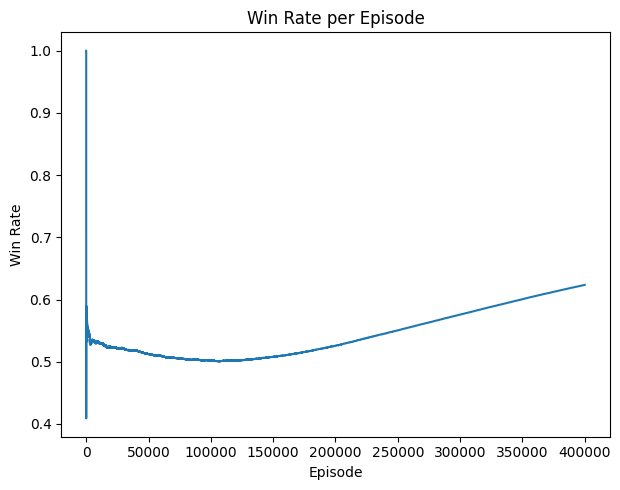

In [3]:
mc_agent_first.plot_metrics()

## Training as second player

In [5]:
from utils import MC_TABLE_SECOND
TRAINING_EPISODES_SECOND = 400000
mc_agent_second = MC(exploration_rate=1, 
              learning_rate=0.1, 
              discount_rate=0.9, 
              min_exploration_rate=0.1)
mc_agent_second.train(400000, RandomPlayer(1), first_Player=False)
mc_agent_second.save_q_table(MC_TABLE_SECOND)

Episode: 100000 with exploration rate: 0.5623445622965476
Episode: 200000 with exploration rate: 0.3162295863754274
Episode: 300000 with exploration rate: 0.17782896466675385
Episode: 400000 with exploration rate: 0.10000057564793013


### Training statistics

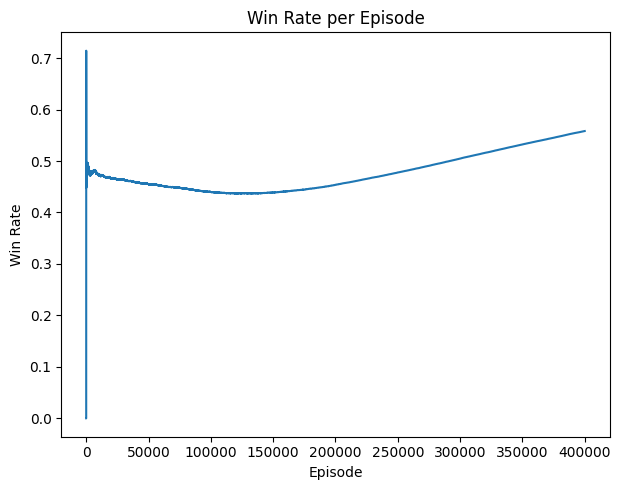

In [6]:
mc_agent_second.plot_metrics()